In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [4]:
class TimeSeriesData: 
    
    def __init__(self, num_points, xmin, xmax):
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin, xmax, num_points)
        self.y_true = np.sin(self.x_data)
        
    def ret_true(self, x_series):
        return np.sin(x_series)
    
    # generate batches of data
    def next_batch(self, batch_size, steps, return_batch_ts=False):
        
        # Get a random starting point for each batch
        rand_start = np.random.rand(batch_size, 1)
        
        # Convert to be on time series
        ts_start = rand_start * (self.xmax - self.xmin - (steps*self.resolution))
        
        # Create a batch time series on the x axis
        batch_ts = ts_start + np.arange(0.0,steps+1) * self.resolution
        
        # Create the Y data for the time series x axis from previous step
        y_batch = np.sin(batch_ts)
        
        # Format data for RNN
        if return_batch_ts:
            # batch_ts -> x axis data
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1), batch_ts
        else: 
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1)

In [5]:
ts_data = TimeSeriesData(250, 0, 10)

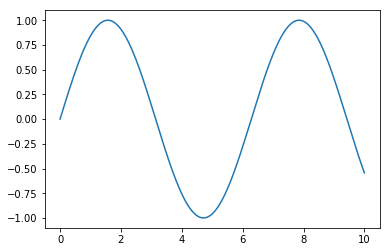

In [6]:
plt.plot(ts_data.x_data, ts_data.y_true)

In [8]:
# adding 30 steps to each of the random batches
num_time_steps = 30
y1, y2, ts = ts_data.next_batch(1, num_time_steps, True)
ts.shape

(1, 31)

In [9]:
ts

array([[2.15762986, 2.19762986, 2.23762986, 2.27762986, 2.31762986,
        2.35762986, 2.39762986, 2.43762986, 2.47762986, 2.51762986,
        2.55762986, 2.59762986, 2.63762986, 2.67762986, 2.71762986,
        2.75762986, 2.79762986, 2.83762986, 2.87762986, 2.91762986,
        2.95762986, 2.99762986, 3.03762986, 3.07762986, 3.11762986,
        3.15762986, 3.19762986, 3.23762986, 3.27762986, 3.31762986,
        3.35762986]])

In [10]:
ts.flatten()

array([2.15762986, 2.19762986, 2.23762986, 2.27762986, 2.31762986,
       2.35762986, 2.39762986, 2.43762986, 2.47762986, 2.51762986,
       2.55762986, 2.59762986, 2.63762986, 2.67762986, 2.71762986,
       2.75762986, 2.79762986, 2.83762986, 2.87762986, 2.91762986,
       2.95762986, 2.99762986, 3.03762986, 3.07762986, 3.11762986,
       3.15762986, 3.19762986, 3.23762986, 3.27762986, 3.31762986,
       3.35762986])

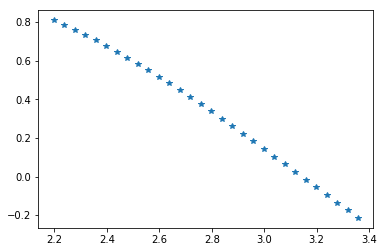

In [19]:
plt.plot(ts.flatten()[1:], y2.flatten(), '*')


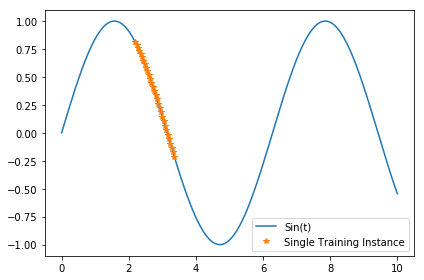

In [25]:
plt.plot(ts_data.x_data, ts_data.y_true, label='Sin(t)')
plt.plot(ts.flatten()[1:], y2.flatten(), '*', label="Single Training Instance")

plt.legend()
plt.tight_layout()


In [26]:
# TRAINING DATA

In [27]:
train_inst = np.linspace(5, 5 + ts_data.resolution*(num_time_steps+1), num_time_steps+1)


In [28]:
train_inst

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

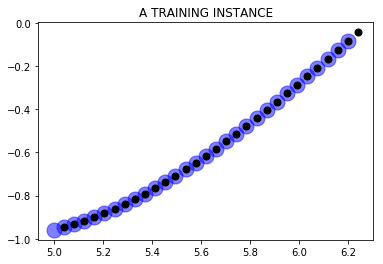

In [30]:
plt.title('A TRAINING INSTANCE')
plt.plot(train_inst[:-1], ts_data.ret_true(train_inst[:-1]), 'bo', markersize=15, alpha=0.5, label='INSTANCE')


# predict one time step ahead (predict an entire series shifted by one)
# given the blue points we want the model to predict the black points
plt.plot(train_inst[1:], ts_data.ret_true(train_inst[1:]), 'ko', markersize=7, label='TARGET')
